# McDonald's Case Study : Fast Food

In [1]:
import pandas as pd

**Key Characteristics of the Data Set**

In [2]:
mcdonalds = pd.read_csv("C:/Users/sathi/Downloads/mcdonalds.csv")
column_names = mcdonalds.columns.tolist()
print(column_names)

['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'VisitFrequency', 'Gender']


**Size of the Data Set**

In [3]:
dimensions = mcdonalds.shape
print(dimensions)

(1453, 15)


**Some Rows of the Data Set**

In [4]:
head_data = mcdonalds.head(3)
print(head_data)

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


**Checking Null Value and Data Type**

In [5]:
mcdonalds.shape
mcdonalds.head()
mcdonalds.dtypes
mcdonalds.info()
mcdonalds.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

### Pie Chart Representing Number of Male and Female's

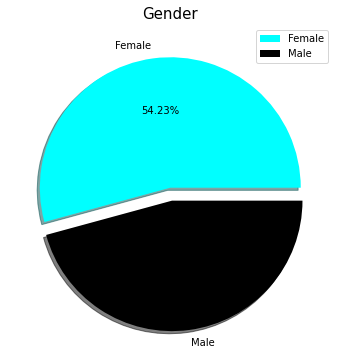

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gender
plt.figure(figsize=(6, 6))
plt.pie(mcdonalds['Gender'].value_counts(), colors=['cyan', 'black'], explode=[0, 0.1], labels=['Female', 'Male'], shadow=True, autopct='%.2f%%')
plt.title('Gender', fontsize=15)
plt.axis('off')
plt.legend()
plt.show()


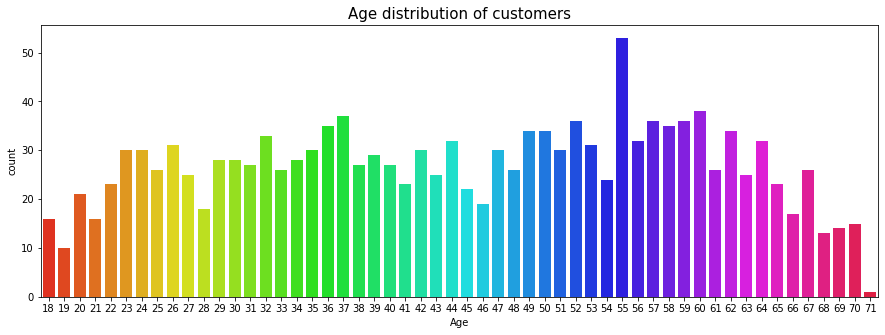

In [9]:
# Age
plt.figure(figsize=(15, 5))
sns.countplot(x=mcdonalds['Age'], palette='hsv')
plt.title('Age distribution of customers', fontsize=15)
plt.show()

**Calculating Column Means after converting them into numeric value**

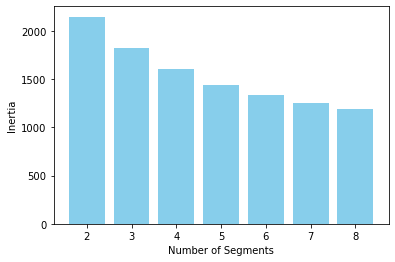

yummy
0.55
convenient
0.91
spicy
0.09
fattening
0.87
greasy
0.53
fast
0.9
cheap
0.6
tasty
0.64
expensive
0.36
healthy
0.2
disgusting
0.24


In [17]:
import numpy as np
from sklearn.cluster import KMeans
# Set seed
np.random.seed(1234)
# Number of clusters to consider
n_clusters_range = range(2, 9)
# Perform k-means analysis with ten random restarts for each number of clus
inertia_values = []
for n_clusters in n_clusters_range:
 kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
 kmeans.fit(MD_x)
 inertia_values.append(kmeans.inertia_)
# Plot scree plot as a bar plot
plt.figure()
plt.bar(n_clusters_range, inertia_values, color='skyblue')
plt.xlabel('Number of Segments')
plt.ylabel('Inertia')
plt.show()

MD_x = mcdonalds.iloc[:, 0:11].values

# Convert "Yes" to 1 and other values to 0
MD_x = np.where(MD_x == "Yes", 1, 0)

# Define the column names
column_names = ["yummy", "convenient", "spicy", "fattening", "greasy",
                "fast", "cheap", "tasty", "expensive", "healthy", "disgusting"]

# Calculate the column means and round to 2 decimal places
column_means = np.round(np.mean(MD_x, axis=0), 2)

# Print the column names and means
for name, mean in zip(column_names, column_means):
    print(f"{name}\n{mean}")

**Applying Principal Component Analysis**

In [13]:
from sklearn.decomposition import PCA

In [14]:
# Select columns 1 to 11 and convert to matrix
MD_x = mcdonalds.iloc[:, 0:11].values

# Convert "Yes" to 1 and other values to 0
MD_x = (MD_x == "Yes").astype(int)

# Perform PCA
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

# Print the summary
component_names = [f"PC{i+1}" for i in range(pca.n_components_)]
explained_variance = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_proportion = np.cumsum(explained_variance_ratio)

print("Importance of components:")
print(" ".join(component_names))
print("Standard deviation", " ".join([f"{std:.5f}" for std in np.sqrt(explained_variance)]))
print("Proportion of Variance", " ".join([f"{prop:.5f}" for prop in explained_variance_ratio]))
print("Cumulative Proportion", " ".join([f"{cum:.5f}" for cum in cumulative_proportion]))


Importance of components:
PC1 PC2 PC3 PC4 PC5 PC6 PC7 PC8 PC9 PC10 PC11
Standard deviation 0.75705 0.60746 0.50462 0.39880 0.33741 0.31027 0.28970 0.27512 0.26525 0.24884 0.23690
Proportion of Variance 0.29945 0.19280 0.13305 0.08310 0.05948 0.05030 0.04385 0.03955 0.03676 0.03235 0.02932
Cumulative Proportion 0.29945 0.49224 0.62529 0.70839 0.76787 0.81817 0.86201 0.90156 0.93832 0.97068 1.00000


**Calculating correlation coefficient**

In [15]:
# Print the standard deviations
print("Standard deviations (1, .., p=11):")
print(pca.singular_values_.round(1))

# Print the rotation
print("Rotation (n x k) = (11 x 11):")
rotation_df = pd.DataFrame(pca.components_, columns=mcdonalds.columns[:11])
rotation_df.columns = [f"PC{i+1}" for i in range(pca.n_components_)]
print(rotation_df.round(3))


Standard deviations (1, .., p=11):
[28.8 23.1 19.2 15.2 12.9 11.8 11.  10.5 10.1  9.5  9. ]
Rotation (n x k) = (11 x 11):
      PC1    PC2    PC3    PC4    PC5    PC6    PC7    PC8    PC9   PC10  \
0  -0.477 -0.155 -0.006  0.116  0.304 -0.108 -0.337 -0.472  0.329 -0.214   
1   0.364  0.016  0.019 -0.034 -0.064 -0.087 -0.611  0.307  0.601  0.077   
2  -0.304 -0.063 -0.037 -0.322 -0.802 -0.065 -0.149 -0.287  0.024  0.192   
3   0.055 -0.142  0.198 -0.354  0.254 -0.097  0.119 -0.003  0.068  0.763   
4  -0.308  0.278  0.071 -0.073  0.361  0.108 -0.129 -0.211 -0.003  0.288   
5   0.171 -0.348 -0.355 -0.407  0.209 -0.595 -0.103 -0.077 -0.261 -0.178   
6  -0.281 -0.060  0.708 -0.386  0.036 -0.087 -0.040  0.360 -0.068 -0.350   
7   0.013 -0.113  0.376  0.590 -0.138 -0.628  0.140 -0.073  0.030  0.176   
8   0.572 -0.018  0.400 -0.161 -0.003  0.166  0.076 -0.639  0.067 -0.186   
9  -0.110 -0.666 -0.076 -0.005  0.009  0.240  0.428  0.079  0.454 -0.038   
10  0.045 -0.542  0.142  0.251  0.002  0.3

**The following commands rotate and
project consumers (in grey) into the first two principal components, plot them and
add the rotated and projected original segmentation variables**

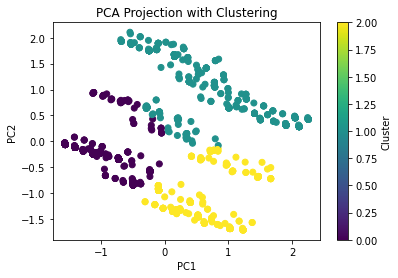

In [18]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


# Select columns 1 to 11 and convert to matrix
MD_x = mcdonalds.iloc[:, 0:11].values

# Convert "Yes" to 1 and other values to 0
MD_x = (MD_x == "Yes").astype(int)

# Perform PCA
pca = PCA(n_components=2)
MD_pca = pca.fit_transform(MD_x)

# Standardize the data
scaler = StandardScaler()
MD_scaled = scaler.fit_transform(MD_pca)

# Perform clustering
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(MD_scaled)

# Plot the results
plt.scatter(MD_scaled[:, 0], MD_scaled[:, 1], c=kmeans.labels_, cmap="viridis")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection with Clustering")
plt.colorbar(label="Cluster")
plt.show()


In [20]:
from collections import Counter
Counter(kmeans.labels_)

Counter({2: 346, 1: 522, 0: 585})

**Graphical Representation of Clusters**

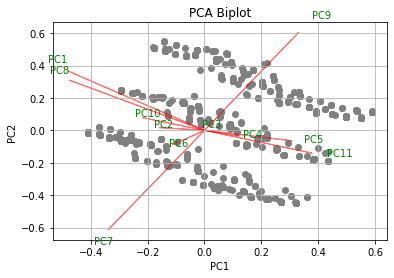

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming MD_pca is a result of PCA
pca = PCA()
pca.fit(MD_x)

# Get the transformed data
transformed_data = pca.transform(MD_x)

# Convert the transformed data to a DataFrame
df_transformed = pd.DataFrame(transformed_data, columns=[f'PC{i+1}' for i in range(transformed_data.shape[1])])

# Create a biplot
def biplot(score, coeff, labels=None):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    
    plt.scatter(xs * scalex, ys * scaley, c='grey')
    
    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, "Var" + str(i))
        else:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, labels[i], color='g')

# Call the function
biplot(transformed_data[:, :2], np.transpose(pca.components_[:2, :]), labels=df_transformed.columns)

# Customize the plot
plt.title('PCA Biplot')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()

**Converting the 'Like' column into numeric column**

In [22]:
mcdonalds['Like']= mcdonalds['Like'].replace({'I hate it!-5': '-5','I love it!+5':'+5'})

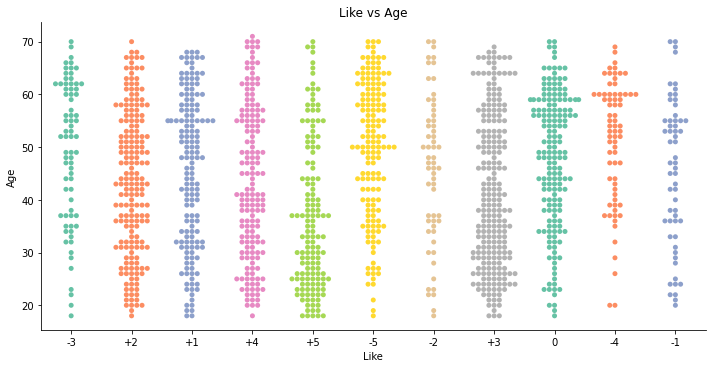

In [23]:
sns.catplot(x="Like", y="Age",data=mcdonalds,
            orient="v", height=5, aspect=2, palette="Set2",kind="swarm")
plt.title('Like vs Age')
plt.show()